In [7]:
# Librariile necesare
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook

In [11]:
def metoda_substitutiei_descendente(U, C, n):
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (C[i] - np.dot(U[i,i+1:], x[i+1:])) / U[i][i]
    return x

In [12]:
def gauss_pivotare_totala(A, C):
    n = A.shape[0]

    indices = np.arange(0, n)
    A_extins = np.concatenate((A, C), axis = 1)

    for k in range(0, n - 1):
        submatrice = A_extins[k:, k:n-1]
        (p, m) = np.unravel_index(submatrice.argmax(), submatrice.shape)
        p, m = p + k, m + k

        # Daca p != k atunci interschimbam liniile p si k, iar daca m != k interschimbam coloanele m si k
        A_extins[[p,k]] = A_extins[[k,p]]
        A_extins[:, [k, m]] = A_extins[:, [m, k]]
        # Schimbam indicii necunoscutelor
        indices[m], indices[k] = indices[k], indices[m]

        for l in range(k + 1, n):
            A_extins[l] = A_extins[l] - (A_extins[l][k] / A_extins[k][k]) * A_extins[k]


    U = np.copy(A_extins[0:n])
    U = np.delete(U, n, axis = 1)
    C = A_extins[:,n]
    
    # Aplicam metoda substitutiei descendente
    x = metoda_substitutiei_descendente(U, C, n)
    
    # La interschimbarea a doua coloane se schimba ordinea necunoscutelor in vectorul x
    return x[indices]


### Construieste graficul functiei patratice definite de matricea A si vectorul b
$$f:\mathbf{R}^n\longrightarrow\mathbf{R}, \quad f(x) = \frac{1}{2}x^T A x - b x$$

<IPython.core.display.Javascript object>


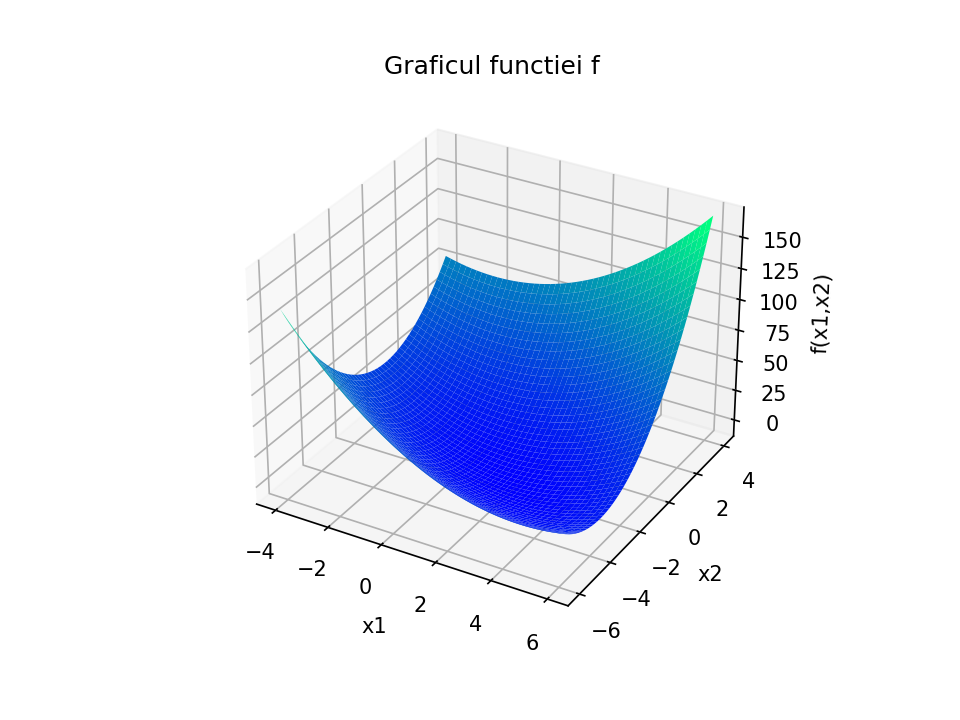

<IPython.core.display.Javascript object>


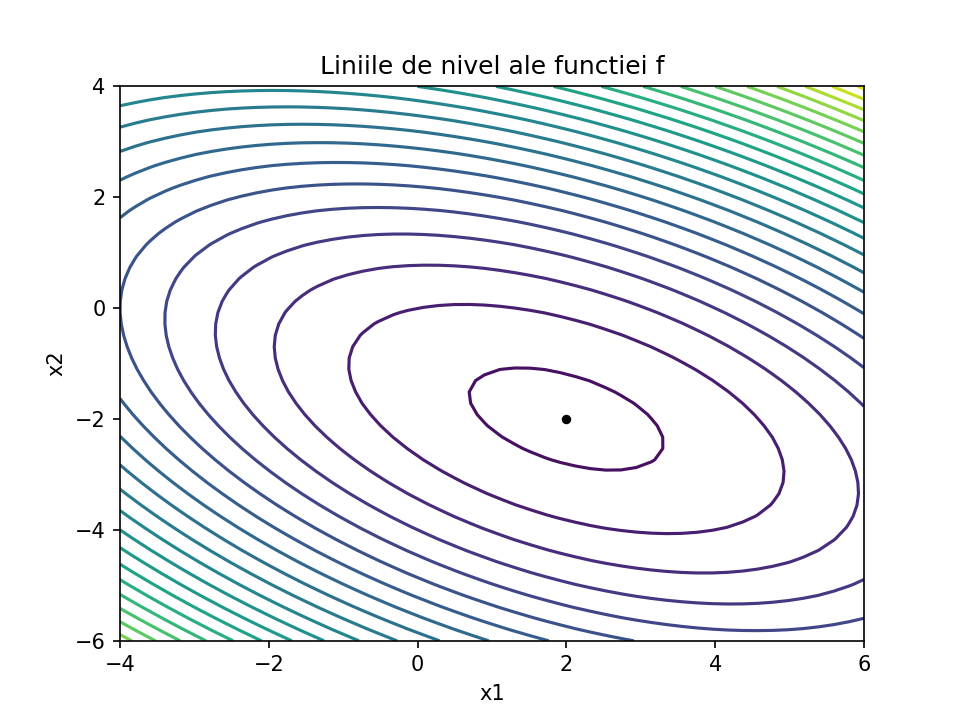

In [16]:
def grid_discret(A, b):
    """
    Construieste un grid discret si evaleaza f in fiecare punct al gridului
    """
    
    size = 50 # Numar de puncte pe fiecare axa
    x1 = np.linspace(-4, 6, size) # Axa x1
    x2 = np.linspace(-6, 4, size) # Axa x2
    X1, X2 = np.meshgrid(x1, x2) # Creeaza un grid pe planul determinat de axele x1 si x2

    X3 = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.array([X1[i,j], X2[i,j]]) # x e vectorul ce contine coordonatele unui punct din gridul definit mai sus
            X3[i,j] = .5 * x @ A @ x - x @ b # Evaluam functia in punctul x
            
    return X1, X2, X3

def grafic_f(A,b):
    """
    Construieste graficul functiei f
    """
    
    # Construieste gridul asociat functiei
    (X1, X2, X3) = grid_discret(A, b)

    # Defineste o figura 3D
    fig1 = plt.figure()
    ax = plt.axes(projection="3d")

    # Construieste graficul functiei f folosind gridul discret X1, X2, X3=f(X1,X2)
    ax.plot_surface(X1, X2, X3, rstride=1, cstride=1, cmap='winter', edgecolor='none')

    # Etichete pe axe
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1,x2)')

    # Titlu
    ax.set_title('Graficul functiei f');

    # Afiseaza figura
    plt.show()
    
def linii_nivel(A,b):
    """
    Construieste liniile de nivel ale functiei f
    """
    
    # Construieste gridul asociat functiei
    (X1, X2, X3) = grid_discret(A, b)
    
    # Ploteaza liniile de nivel ale functiei f
    fig2 = plt.figure()
    plt.contour(X1, X2, X3, levels = 25) # levels = numarul de linii de nivel
    
    # Etichete pe axe
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    # Titlu
    plt.title('Liniile de nivel ale functiei f');
    
    # Afiseaza figura
    plt.show()
        
# Definire functie f prin matricea A si vectorul b
A = np.array([[3, 2],[2, 6]]).astype(float) # Matrice pozitiv definita
b = np.array([[2],[-8]]).astype(float)

# Apelare functii grafic
grafic_f(A,b)
linii_nivel(A,b)

# Punctul de minim determinat prin rezolvarea sistemului A*x=b
x_num = gauss_pivotare_totala(A,b)
plt.scatter(x_num[0], x_num[1], s=50, c='black', marker='.')
plt.show()